1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Path to your main dataset folder
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]

all_data = []       # List to store all data (each item is a 2D array from a file)
all_labels = []     # List to store labels corresponding to each data array
activity_code_list = []  # List to store activity codes

counter = 0
ADL = 0
FALL = 0

for subject_id in subject_ids:
    folder_path = os.path.join(base_path, subject_id)

    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            try:
                # Extract activity code from filename (assuming format is like 'D01_01.txt')
                activity_code = filename.split('_')[0]
                activity_code_list.append(activity_code)
                
                # determine label
                if activity_code.startswith('D'):
                    label = 'ADL'
                    ADL += 1
                elif activity_code.startswith('F'):
                    label = 'Fall'
                    FALL += 1
                else:
                    label = 'Unknown'

                # Load the first 6 columns of comma-separated file
                df = pd.read_csv(file_path, header=None, delimiter=',', usecols=[0, 1, 2, 3, 4, 5], on_bad_lines='skip')
                data = df.to_numpy()    # Convert to NumPy array
                data = data.transpose()  # Transpose the data to get the desired shape
                
                # Append the 2D array to the list
                all_data.append(data)
                all_labels.append(label)
                counter += 1

            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                
print(f"Total files processed: {counter}")
print(f"Total ADL labels: {ADL}")
print(f"Total Fall labels: {FALL}")


Total files processed: 4505
Total ADL labels: 2707
Total Fall labels: 1798


In [4]:
print(len(activity_code_list))

4505


## validating length/count of data to check if it is correct

In [5]:
print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')

number of total readings: 4505
number of total labels: 4505


In [6]:
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

Unique labels and their counts:
ADL: 2707
Fall: 1798


## separate ADL from Fall

In [7]:
# create lists to store data for each label
adls = []
falls = []

for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        adls.append(all_data[i])
    elif all_labels[i] == 'Fall':
        falls.append(all_data[i])

In [8]:
len(adls), len(falls)

(2707, 1798)

In [9]:
falls[1797].shape  # Check the shape of the first 2D array

(6, 2999)

In [10]:
falls[0][0,:]

array([  -9,   -3,   -1, ..., -118, -117, -112])

## plot random file

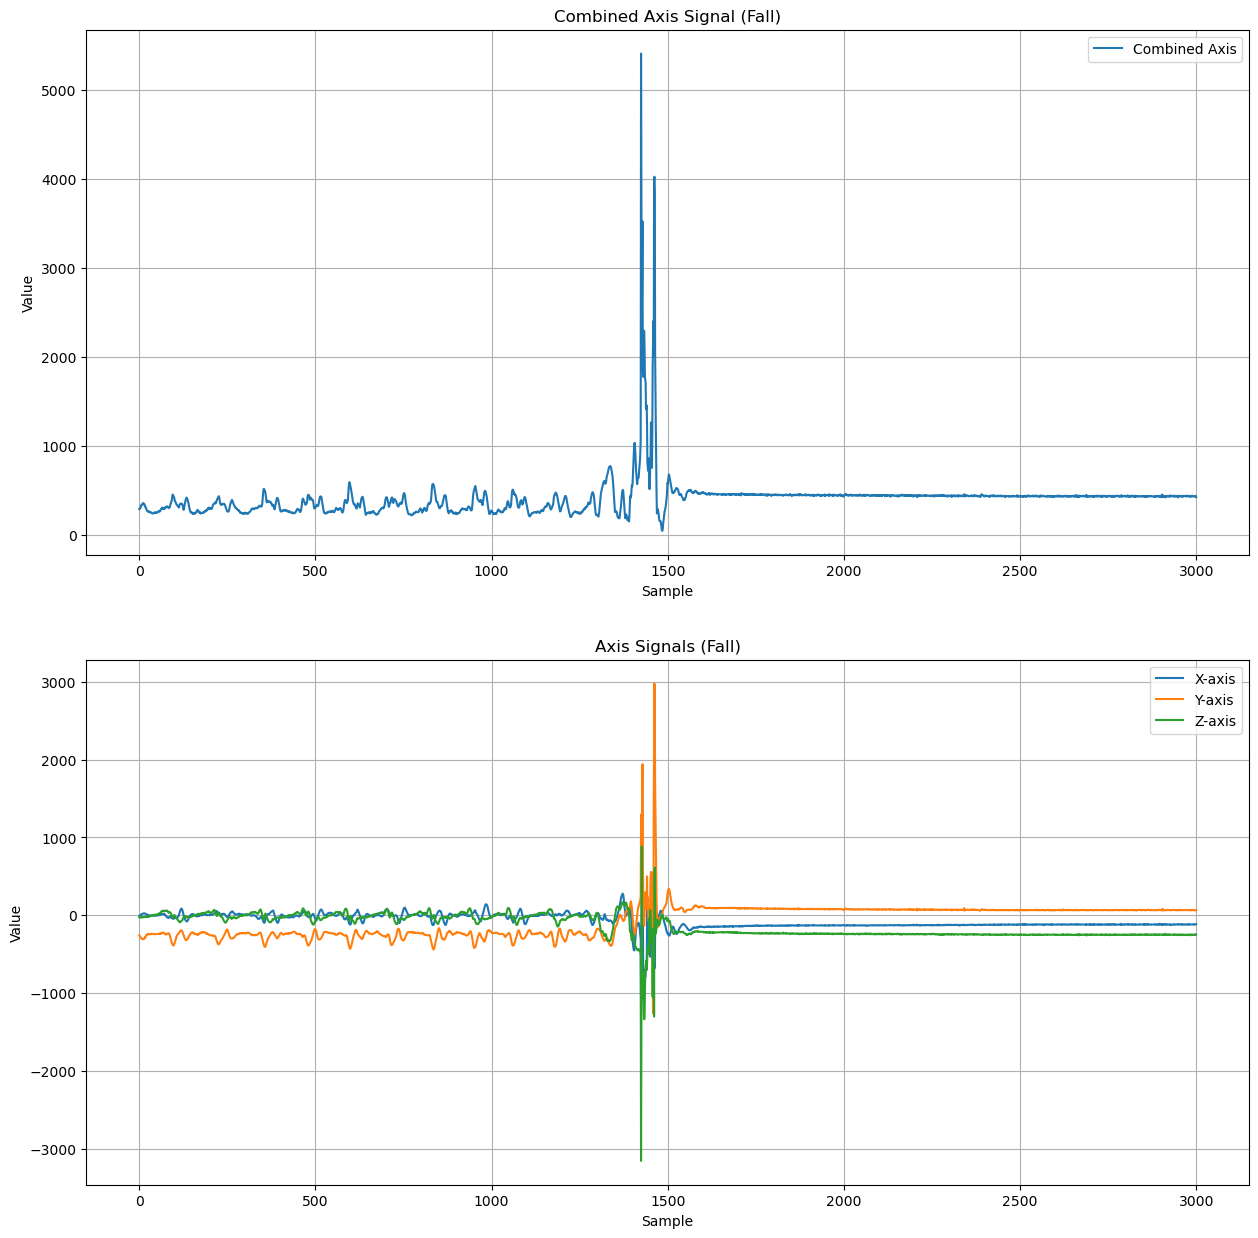

In [11]:
all_axis = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
plt.plot(all_axis, label='Combined Axis')
plt.title(f'Combined Axis Signal (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.title('Axis Signals (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.show()

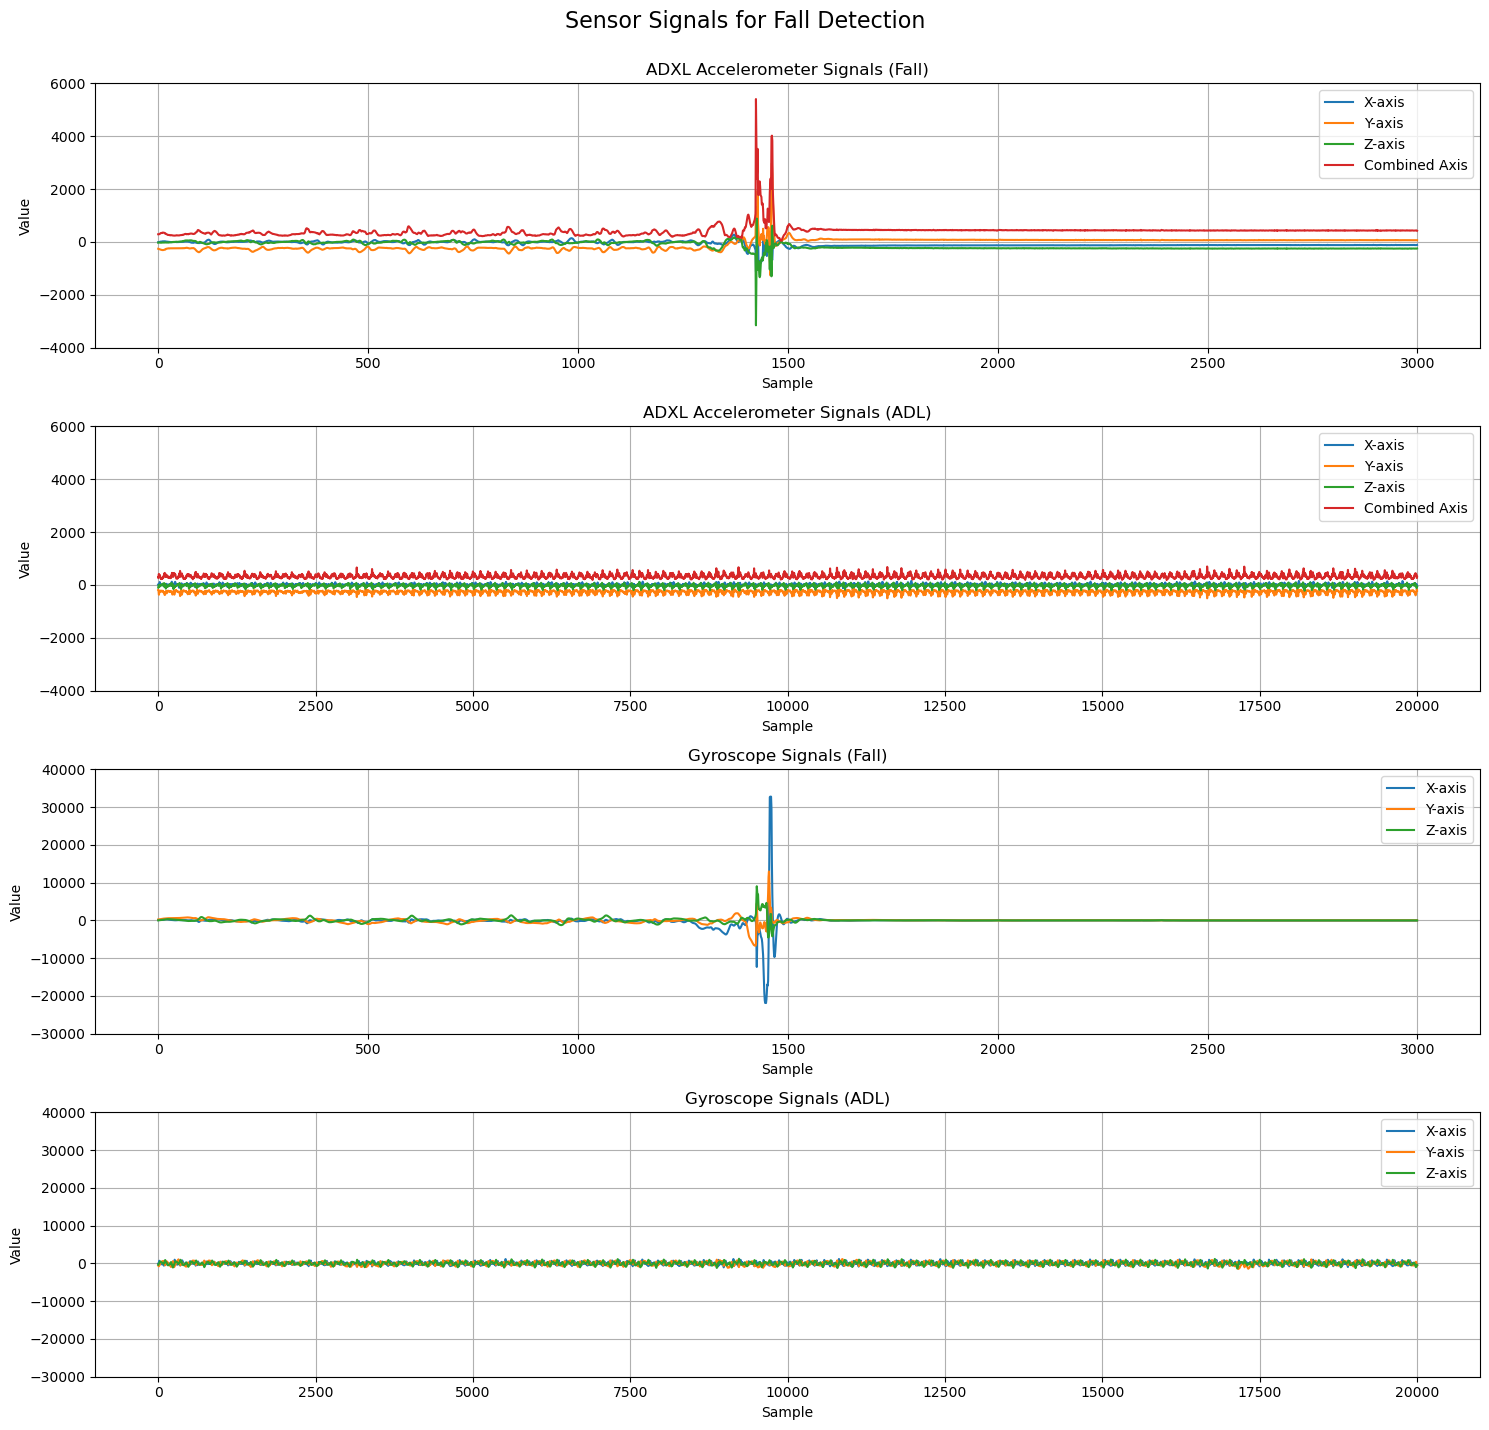

In [13]:
# compare plot of fall recording and adl recording

all_axis_fall = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
all_axis_adl = np.abs(adls[0][0, :]) + np.abs(adls[0][1, :]) + np.abs(adls[0][2, :])

plt.figure(figsize=(15, 15))

# Plot the first 3 signals together
plt.subplot(4, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.plot(all_axis_fall, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (Fall)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(adls[0][0, :], label='X-axis')
plt.plot(adls[0][1, :], label='Y-axis')
plt.plot(adls[0][2, :], label='Z-axis')
plt.plot(all_axis_adl, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (ADL)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the last 3 signals and adding together
plt.subplot(4, 1, 3)
plt.plot(falls[0][3, :], label='X-axis')
plt.plot(falls[0][4, :], label='Y-axis')
plt.plot(falls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (Fall)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(adls[0][3, :], label='X-axis')
plt.plot(adls[0][4, :], label='Y-axis')
plt.plot(adls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (ADL)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()


plt.suptitle('Sensor Signals for Fall Detection', fontsize=16)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])  # Adjust the title position
plt.show()

In [14]:
from scipy.signal import butter, filtfilt

In [14]:
# apply 4th order IIR butterworth filter

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter parameters
def lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
def plot_filtered_signals(original, filtered, title):
    plt.figure(figsize=(15, 5))
    plt.plot(original, label='Original Signal', alpha=0.5)
    plt.plot(filtered, label='Filtered Signal', color='red')
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
all_data_filtered = []  # List to store filtered data
for i in range(len(all_data)):
    filtered_data = []
    for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
        filtered_signal = lowpass_filter(all_data[i][j, :], cutoff=5, fs=200, order=4)
        filtered_data.append(filtered_signal)
    all_data_filtered.append(np.array(filtered_data))

# for i in range(len(all_data)):
#     # Apply lowpass filter to each signal
#     for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
#         all_data[i][j, :] = lowpass_filter(all_data[i][j, :], cutoff=10, fs=100, order=4)



Number of filtered ADL signals: 2707
Number of filtered Fall signals: 1798


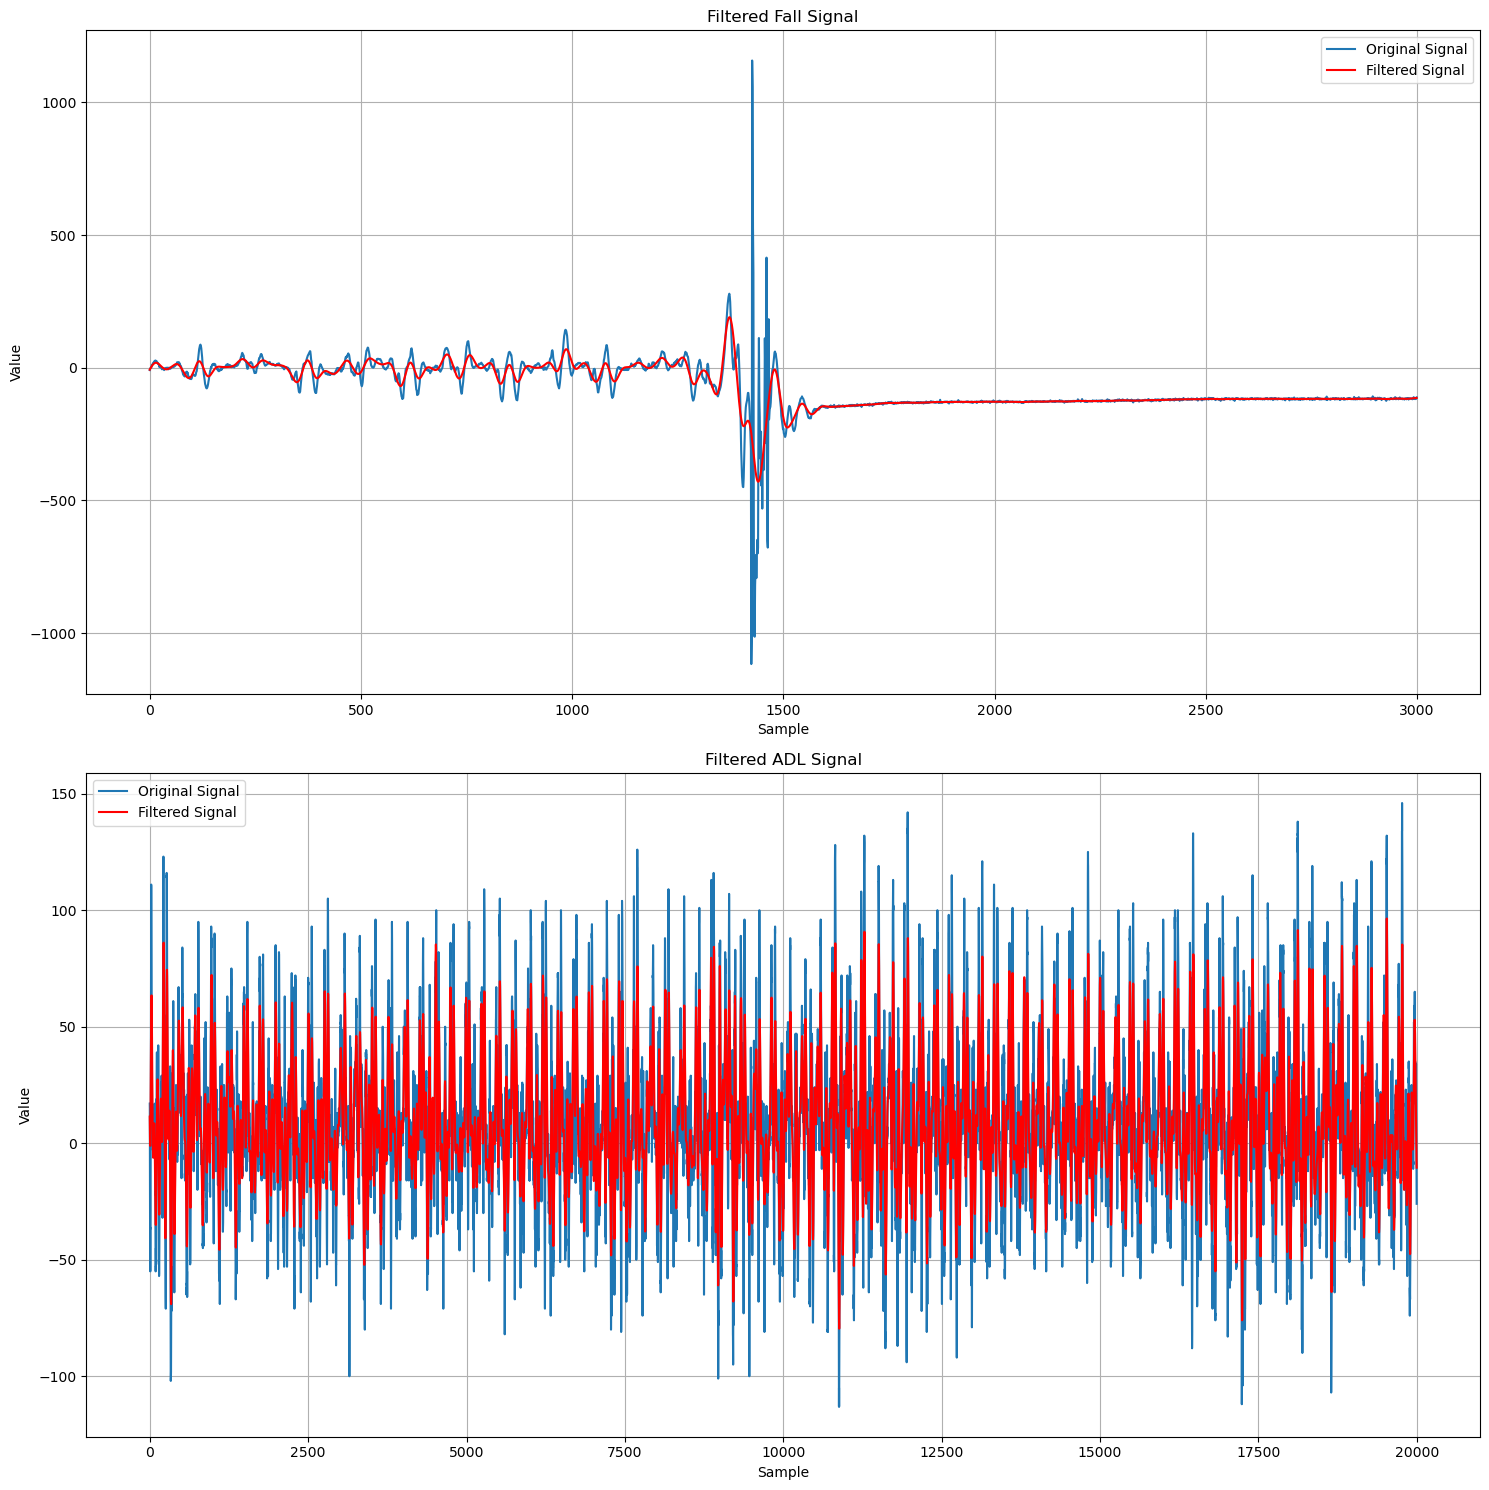

In [21]:
filtered_falls = []
filtered_adls = []
for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        filtered_adls.append(all_data_filtered[i])
    elif all_labels[i] == 'Fall':
        filtered_falls.append(all_data_filtered[i])
print(f"Number of filtered ADL signals: {len(filtered_adls)}")
print(f"Number of filtered Fall signals: {len(filtered_falls)}")
# Plot the first filtered fall signal vs the original
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='Original Signal')
plt.plot(filtered_falls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered Fall Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(adls[0][0, :], label='Original Signal')
plt.plot(filtered_adls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered ADL Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

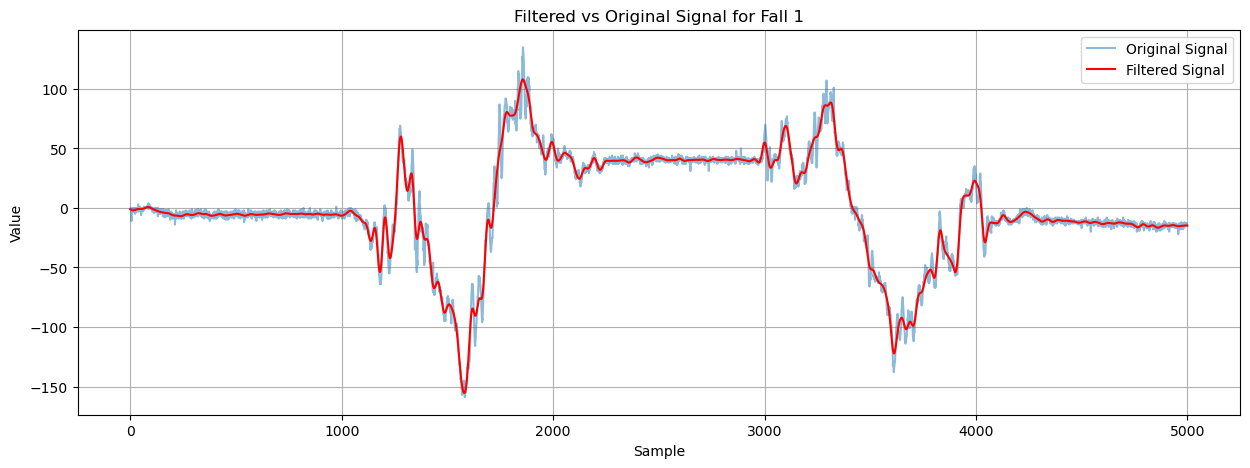

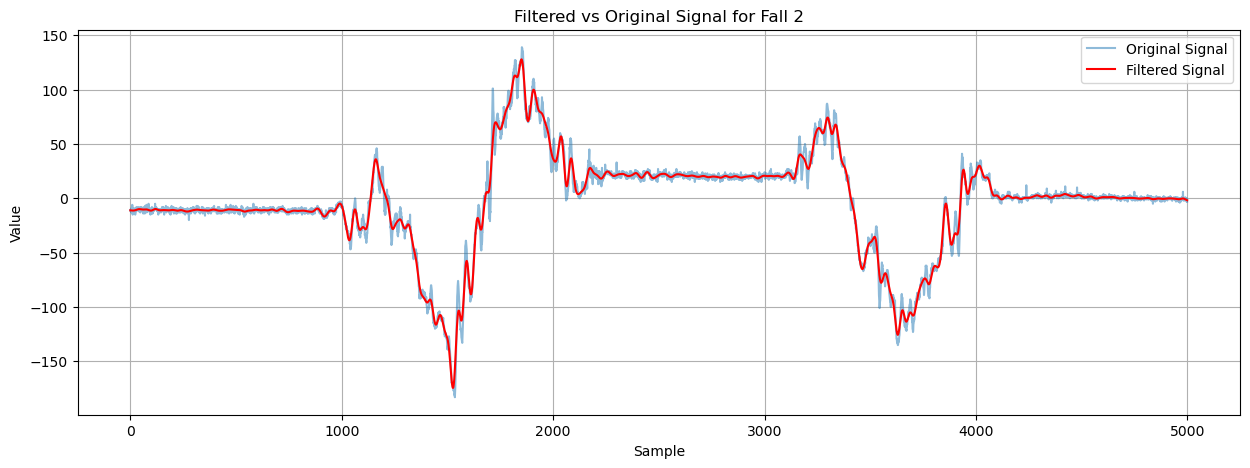

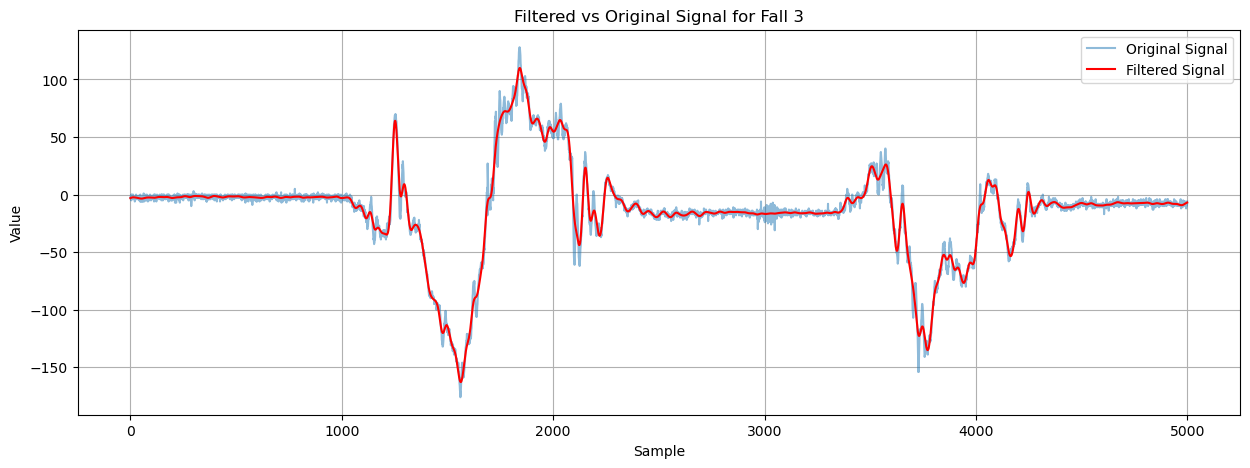

In [18]:
# plot the filtered signals vs original signals
for i in range(3):
    original_signal = all_data[-(i+1)][0, :]
    filtered_signal = all_data_filtered[-(i+1)][0, :]
    plot_filtered_signals(original_signal, filtered_signal, f'Filtered vs Original Signal for Fall {i+1}')

In [ ]:
c3_features = []
for data in signal_list:
    # Compute acceleration magnitude: √(x² + y² + z²)
    acc_mag = np.linalg.norm(data[0:3, :], axis=0)
    c3_segment_values = []
    # Slide over the signal with the given window size and step size
    for i in range(0, acc_mag.shape[0] - window_size + 1, step_size):
        segment = acc_mag[i:i + window_size]
        
        # Compute max and min for this segment
        max_val = np.max(segment)
        min_val = np.min(segment)
        
        # Calculate the RMS of the range (max - min)
        range_val = max_val - min_val
        rms_c3 = np.sqrt(np.mean(np.square(range_val)))  # RMS of a single value (range)
        
        c3_segment_values.append(rms_c3)
    # Append the list of C3 values for this signal
    c3_features.append(c3_segment_values)
return c3_features

In [ ]:
# define function for feature extraction (Sum vector magnitude on horizontal plane)
def sum_vector_magnitude(signal_list, method='all'):
    """
    Compute sum vector magnitude feature from a list of sensor data arrays.

    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                     Rows 0-2: Accelerometer [x, y, z]
        method: str, one of ['mean', 'max', 'all']
                - 'mean': return mean of value for the whole signal
                - 'max': return max of value
                - 'all': return list of values for every sample

    Returns:
        List of C2 feature values (one per signal input)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_z = data[2, :]

        values = np.sqrt(acc_x**2 + acc_z**2)

        if method == 'mean':
            features.append(np.mean(values))
        elif method == 'max':
            features.append(np.max(values))
        elif method == 'all':
            features.append(values)
        else:
            raise ValueError("Invalid method. Choose from 'mean', 'max', or 'all'.")
        
    print(f"Number of features extracted (f1): {len(features)}")
    return features


def max_peak_to_peak_amp(signal_list, window_size=50, step_size=25):
    """
    Compute max peak to peak amplitude feature from a list of sensor data arrays.
    
    Parameters:
        signal_list:    list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z] (ignored)
        window_size: int, number of samples in each window
        step_size: int, sliding window step size

    Returns:
        List of feature values (one per signal input)
    """
    features = []

    for data in signal_list:
        # Compute acceleration magnitude: √(x² + y² + z²)
        acc_mag = np.linalg.norm(data[0:3, :], axis=0)

        segment_values = []

        # Slide over the signal with the given window size and step size
        for i in range(0, acc_mag.shape[0] - window_size + 1, step_size):
            segment = acc_mag[i:i + window_size]
            
            # Compute max and min for this segment
            max_val = np.max(segment)
            min_val = np.min(segment)
            
            # Calculate the RMS of the range (max - min)
            range_val = max_val - min_val
            rms_c3 = np.sqrt(np.mean(np.square(range_val)))  # RMS of a single value (range)
            
            segment_values.append(rms_c3)

        # Append the list of C3 values for this signal
        features.append(segment_values)

    print(f"Number of features extracted (f2): {len(features)}")
    return features


# define function for feature extraction Standard deviation magnitude on horizontal plane
def standard_deviation_magnitude_h(signal_list, window_size=50, step_size=25):
    """
    Compute Standard Deviation Magnitude feature from a list of 2D sensor data arrays.
    
    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z]
        window_size: int, size of the sliding window
        step_size: int, step size of the sliding window
    
    Returns:
        List of C8 values (one per input signal)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_z = data[2, :]

        values = []

        for i in range(0, acc_x.shape[0] - window_size + 1, step_size):
            segment_x = acc_x[i:i + window_size]
            segment_z = acc_z[i:i + window_size]

            std_x = np.std(segment_x)
            std_z = np.std(segment_z)

            value = np.sqrt(std_x**2 + std_z**2)
            values.append(value)
        
        features.append(values)
        # Optionally: use mean or max of all C8 values in the signal
        # features.append(np.mean(values))  # or np.max(values)

    print(f"Number of features extracted (f3): {len(features)}")
    return features


# def standard_deviation_magnitude_h(signal_list, window_size=50, step_size=25):
#     """
#     Compute Standard Deviation Magnitude feature from a list of 6-row sensor data arrays.
    
#     Parameters:
#         signal_list: list of np.ndarray, each of shape (6, n_samples)
#                         Rows 0-2: Accelerometer [x, y, z]
#                         Rows 3-5: Gyroscope [x, y, z] (ignored)
#         window_size: int, number of samples in each window
#         step_size: int, sliding step size

#     Returns:
#         List of C9 values (one per signal input)
#     """
#     features = []

#     for data in signal_list:
#         acc_x = data[0, :]
#         # acc_y = data[1, :]
#         acc_z = data[2, :]

#         values = []

#         for i in range(0, acc_x.shape[0] - window_size + 1, step_size):
#             seg_x = acc_x[i:i + window_size]
#             # seg_y = acc_y[i:i + window_size]
#             seg_z = acc_z[i:i + window_size]

#             std_x = np.std(seg_x)
#             # std_y = np.std(seg_y)
#             std_z = np.std(seg_z)

#             value = np.sqrt(std_x**2 + std_z**2)
#             values.append(value)

#         # Optionally summarize: mean or max or keep the full list
#         # features.append(np.mean(values))  # or np.max(values)
#         features.append(values)

#     print(f"Number of features extracted (f4): {len(features)}")
#     return features


# define function for feature extraction Standard deviation magnitude
def standard_deviation_magnitude(signal_list, window_size=50, step_size=25):
    """
    Compute Standard Deviation Magnitude feature from a list of 6-row sensor data arrays.
    
    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z] (ignored)
        window_size: int, number of samples in each window
        step_size: int, sliding step size

    Returns:
        List of C9 values (one per signal input)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_y = data[1, :]
        acc_z = data[2, :]

        values = []

        for i in range(0, acc_x.shape[0] - window_size + 1, step_size):
            seg_x = acc_x[i:i + window_size]
            seg_y = acc_y[i:i + window_size]
            seg_z = acc_z[i:i + window_size]

            std_x = np.std(seg_x)
            std_y = np.std(seg_y)
            std_z = np.std(seg_z)

            value = np.sqrt(std_x**2 + std_y**2 + std_z**2)
            values.append(value)

        # Optionally summarize: mean or max or keep the full list
        # features.append(np.mean(values))  # or np.max(values)
        features.append(values)

    print(f"Number of features extracted (f4): {len(features)}")
    return features

# data_array = all_data
# f2 = max_peak_to_peak_amp(data_array)
# f3 = standard_deviation_magnitude_h(data_array)

In [16]:
data_array = all_data

f1 = sum_vector_magnitude(data_array, method='all')
f2 = max_peak_to_peak_amp(data_array)
f3 = standard_deviation_magnitude_h(data_array)
f4 = standard_deviation_magnitude(data_array)


Number of features extracted (f1): 4505
Number of features extracted (f2): 4505
Number of features extracted (f3): 4505
Number of features extracted (f4): 4505


In [17]:
print(type(f1), len(f1), len(f1[4]))  # Use len(f1) since f1 is a list of arrays
print(type(f2), len(f2), len(f2[0]))  # Use np.shape(f2) since f2 is a list of arrays
print(type(f3), len(f3), len(f3[0]))  # Use np.shape(f3) since f3 is a list of arrays
print(type(f4), len(f4), len(f4[0]))  # Use np.shape(f4) since f4 is a list of arrays




<class 'list'> 4505 5000
<class 'list'> 4505 798
<class 'list'> 4505 798
<class 'list'> 4505 798


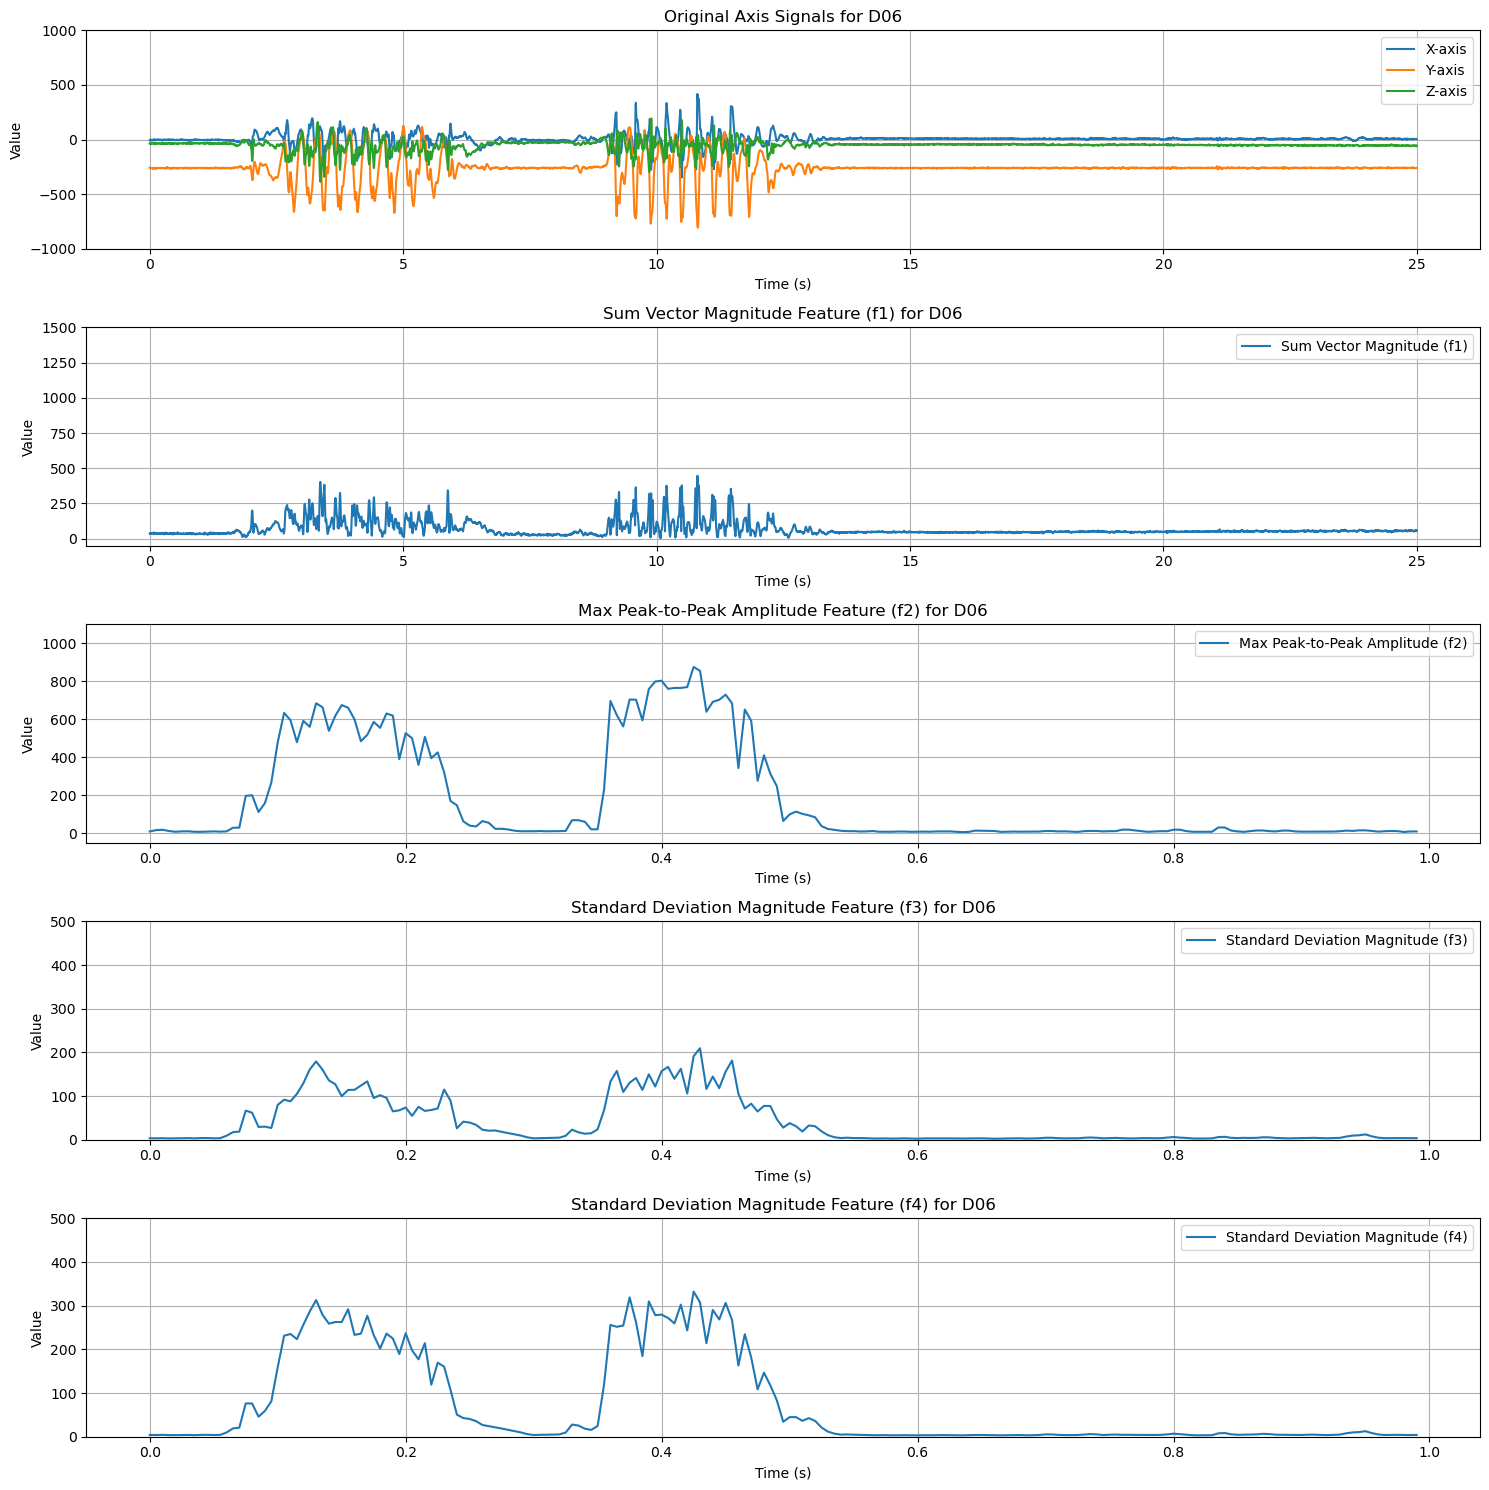

In [101]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude Feature (f1) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

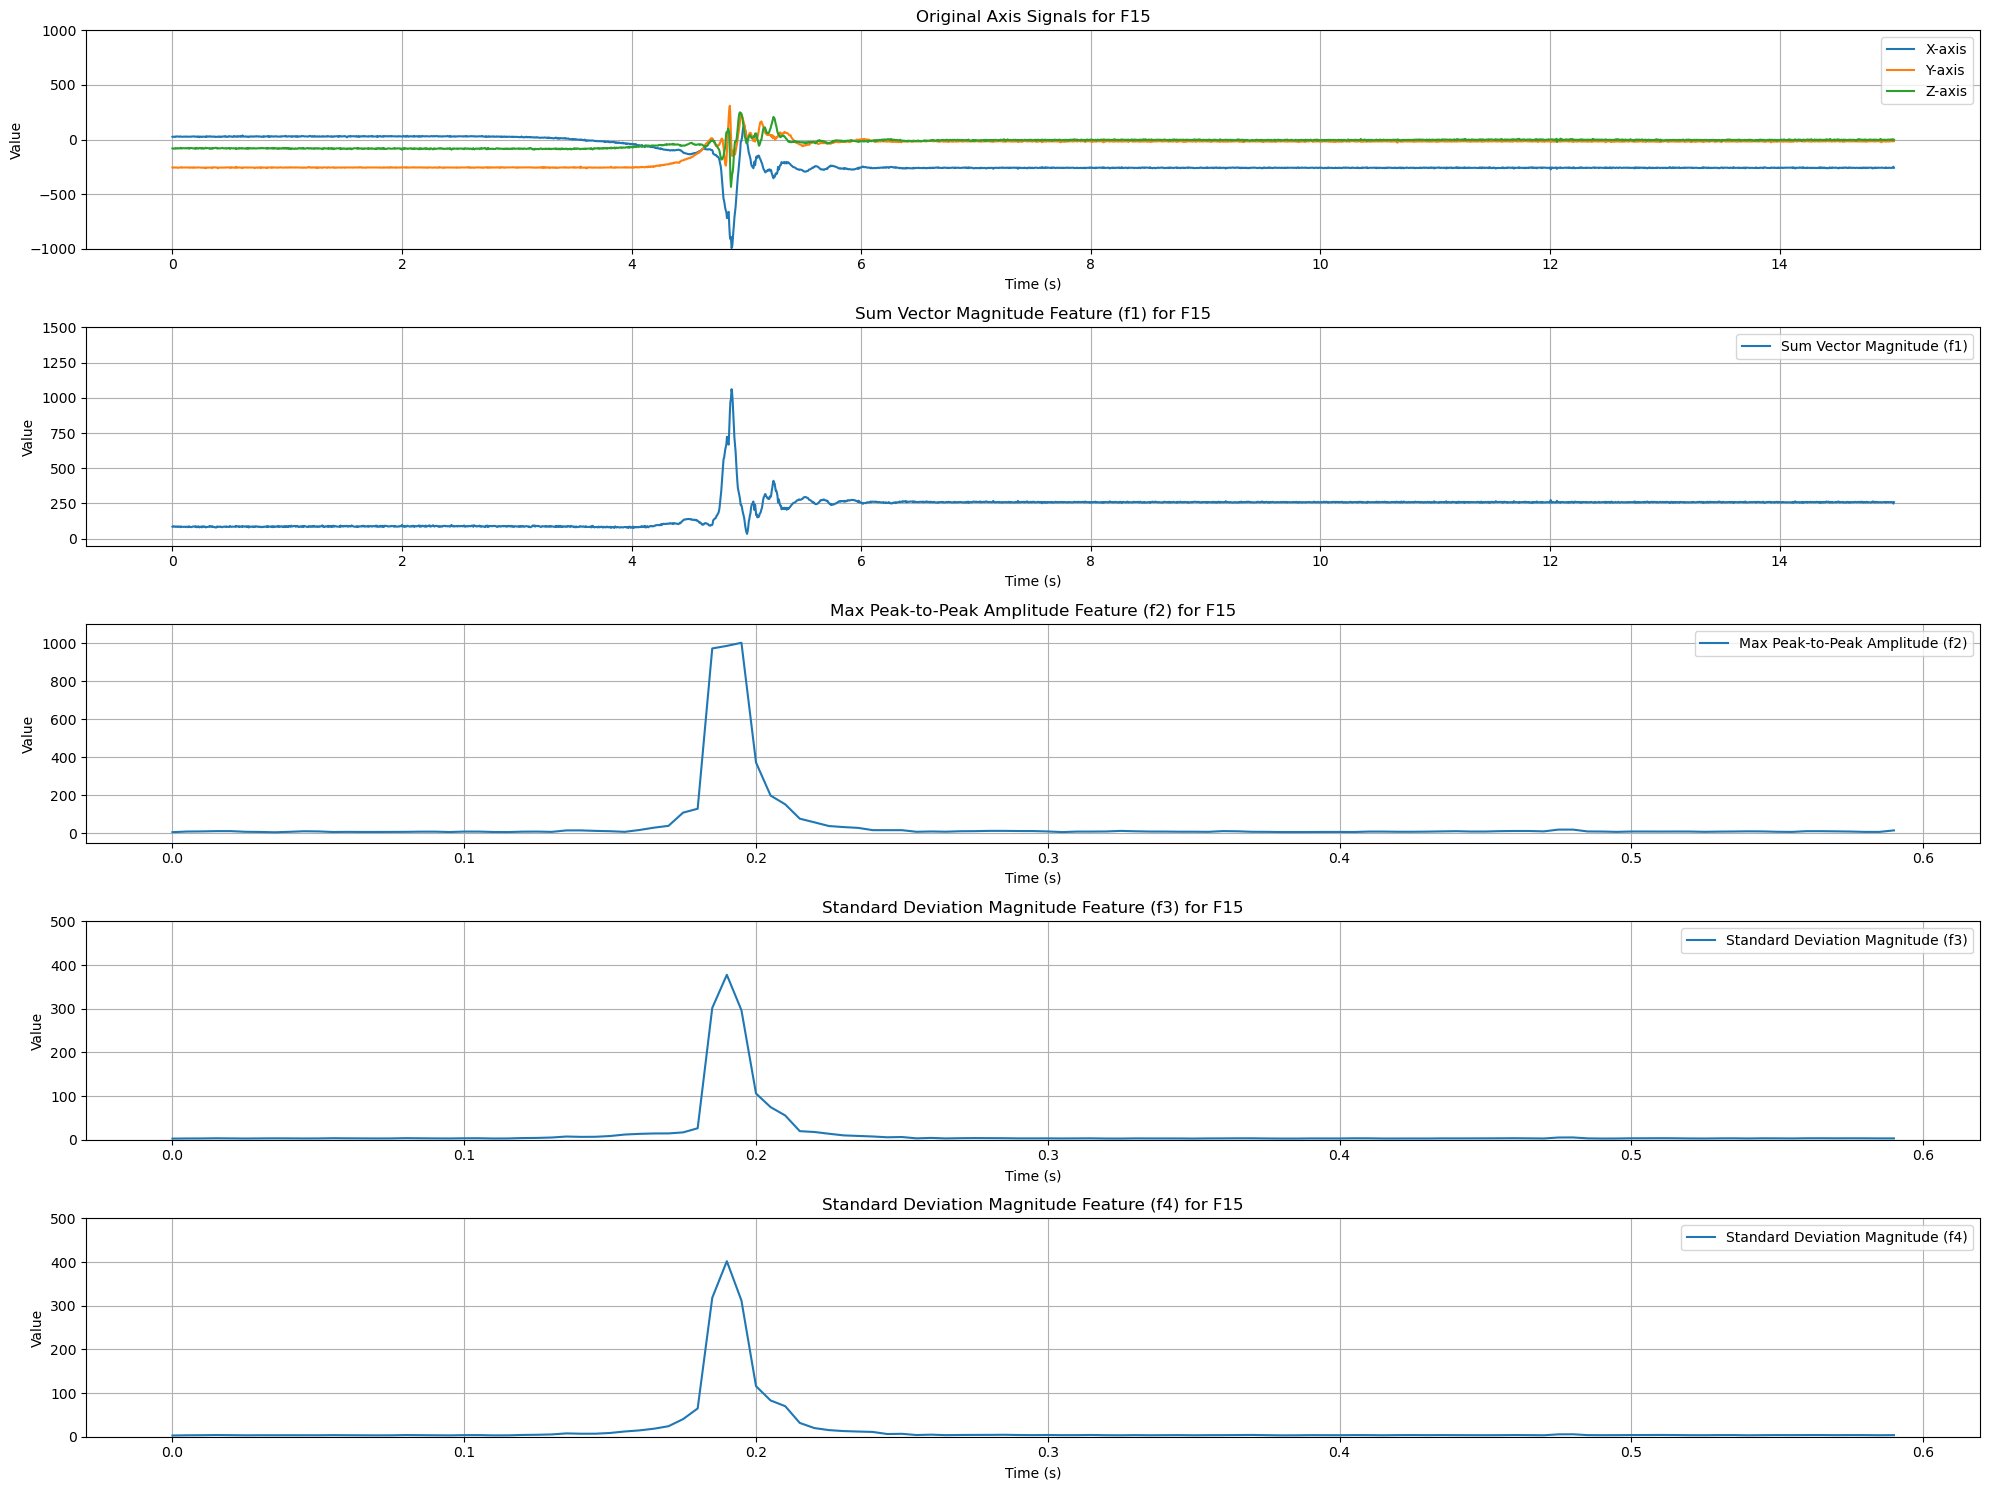

In [ ]:
sample_num = 1000

plt.figure(figsize=(20, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude Feature (f1) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4) for {activity_code_list[sample_num]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [103]:
# crate window for visualizing time of fall

# if value of x, y and z axis is less than 0.5 then window starts
def find_fall_window(signal, threshold=600):
    """
    Find the start and end indices of the fall window in a signal.
    
    Parameters:
        signal: np.ndarray, the signal data
        threshold: float, threshold for detecting fall
    
    Returns:
        start: int, start index of the fall window
        end: int, end index of the fall window
    """
    # Find where all three axes are below the threshold
    # mask = (np.abs(signal[0]) < threshold) & (np.abs(signal[1]) < threshold) & (np.abs(signal[2]) < threshold)
    # mask_value = (np.abs(signal[0]) + np.abs(signal[1]) + np.abs(signal[2]))
    mask = (np.abs(signal[0]) + np.abs(signal[2])) > threshold

    # Find the start and end indices of the fall window
    start = np.where(mask)[0][0] if np.any(mask) else None
    # end = np.where(mask)[0][-1] if np.any(mask) else None
    end = start + 100 if start is not None else None  # Assuming a fixed window size of 2000 samples
    # print(mask_value)
    return start, end

def plot_fall_window(signal, start, end):
    """
    Plot a window of the fall signal.
    
    Parameters:
        signal: np.ndarray, the signal data
        start: int, start index of the window
        end: int, end index of the window
    """
    plt.figure(figsize=(15, 5))
    time = np.arange(start, end) / 200  # Assuming a sampling rate of 200 Hz
    plt.plot(time, signal[start:end], label='Fall Signal')
    plt.title('Window of Fall Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

In [107]:
sample_number = 1000  # Index of the sample you want to analyze
signal = all_data[sample_number][0:3,:]  # Example signal
print(signal.shape)

(3, 3000)


In [108]:
start, end = find_fall_window(signal)
print(f"Start index of fall window: {start}")
print(f"End index of fall window: {end}")

Start index of fall window: 959
End index of fall window: 1059


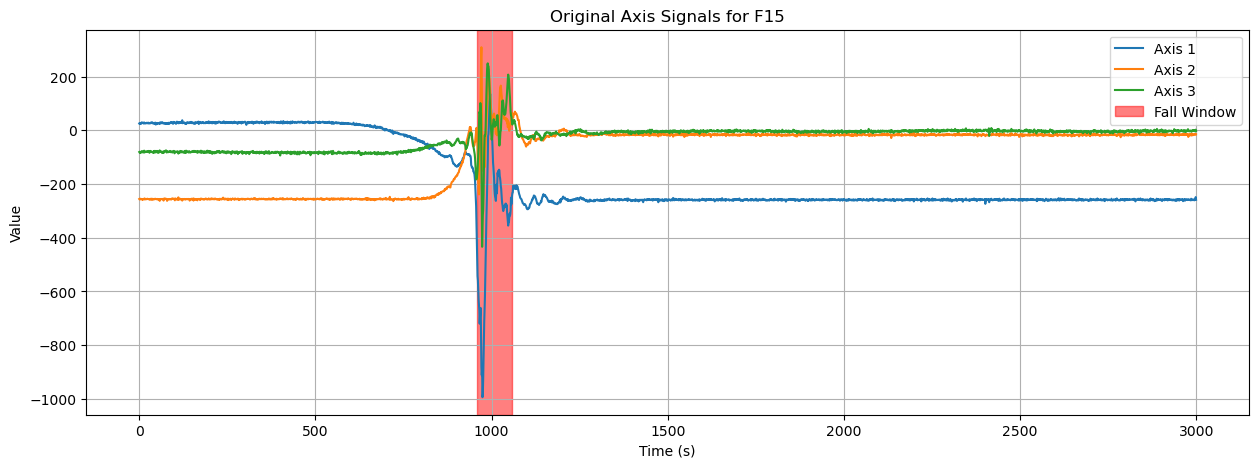

In [109]:
# plot the fall window with the signal
time = np.arange(0, len(all_data[sample_number][0, :])) / 200  # Assuming a sampling rate of 200 Hz

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot( signal[i,:], label=f'Axis {i+1}')
plt.axvspan(start, end, color='red', alpha=0.5, label='Fall Window')
plt.title(f'Original Axis Signals for {activity_code_list[sample_number]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# calculate and plot the fall window for 15 samples
sample_numbers = np.random.randint(1, 406, size=15)

/var/folders/lm/hkt5kj_d5xj13bc2cb4x2wg80000gn/T/ipykernel_4882/488241236.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


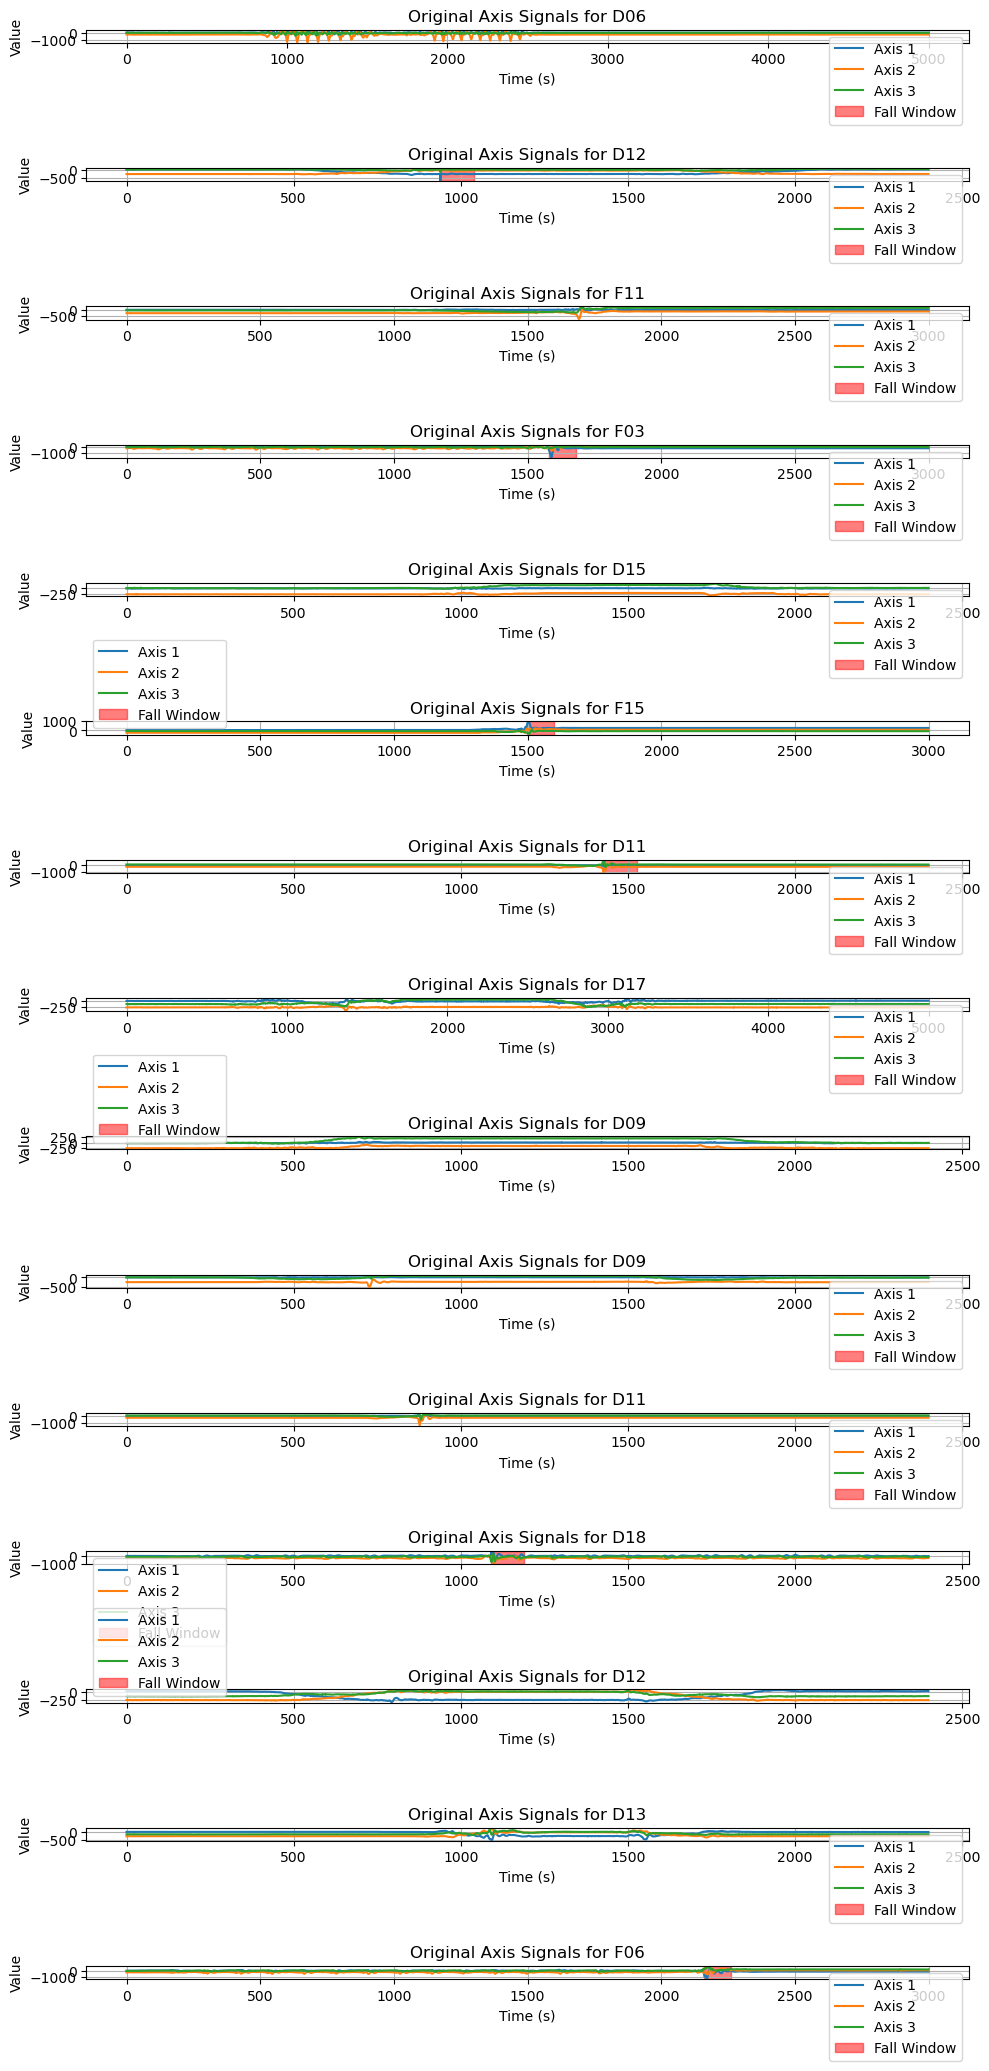

In [116]:


plt.figure(figsize=(10, 20))
for i, sample_number in enumerate(sample_numbers):
    signal = all_data[sample_number][0:3,:]  # Example signal
    start, end = find_fall_window(signal, threshold=750)
    
    plt.subplot(15, 1, i+1)
    for j in range(3):
        plt.plot(signal[j,:], label=f'Axis {j+1}')
    plt.axvspan(start, end, color='red', alpha=0.5, label='Fall Window')
    plt.title(f'Original Axis Signals for {activity_code_list[sample_number]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.grid()